In [ ]:
# Step 1: Import required libraries and read the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles for plots
sns.set(style="whitegrid")

# Read the dataset
df_books = pd.read_csv("recCSVs/Books.csv")
# Drop image URL columns
books_df_cleaned = df_books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])

# Show first few rows
print(books_df_cleaned.head())

# Read the dataset
df_rating = pd.read_csv("recCSVs/Ratings.csv")
# Drop image URL columns
# books_df_cleaned = df_books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])

# Show first few rows
print(df_rating.head())



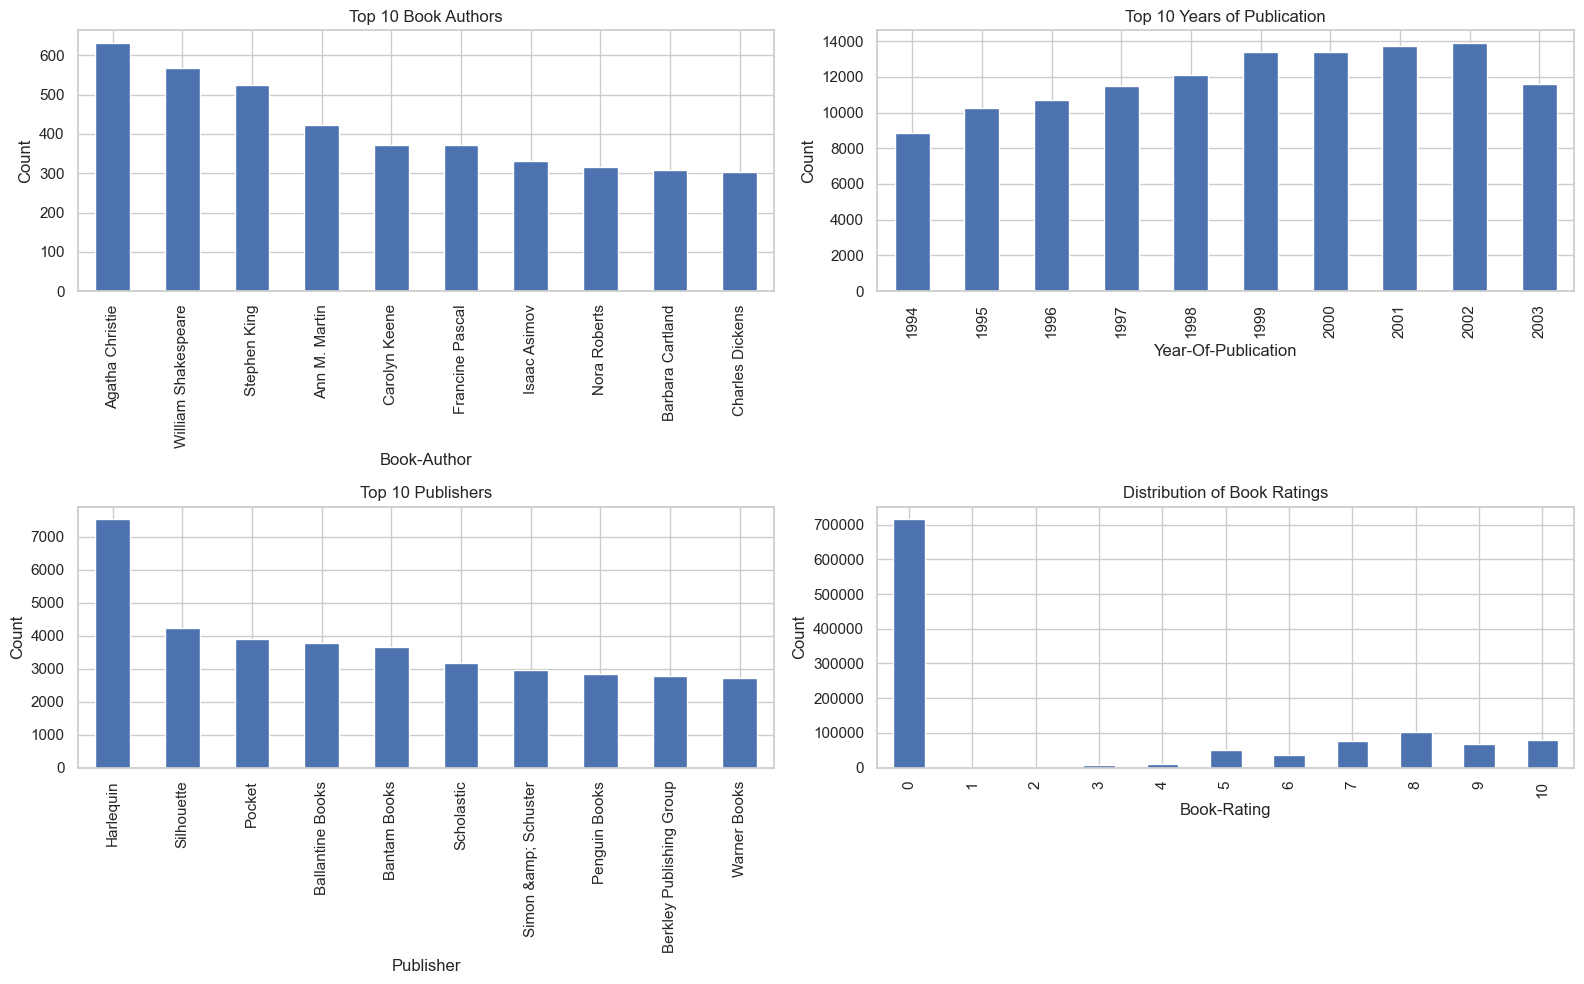

In [11]:
# Create subplots to show value counts of key columns in the books and ratings datasets
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Bar plot for Book-Author frequency (top 10)
books_df_cleaned['Book-Author'].value_counts().head(10).plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Book Authors')
axes[0, 0].set_ylabel('Count')

# Bar plot for Year-Of-Publication frequency (top 10)
books_df_cleaned['Year-Of-Publication'].value_counts().head(10).sort_index().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Years of Publication')
axes[0, 1].set_ylabel('Count')

# Bar plot for Publisher frequency (top 10)
books_df_cleaned['Publisher'].value_counts().head(10).plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Publishers')
axes[1, 0].set_ylabel('Count')

# Bar plot for Book-Rating frequency
df_rating['Book-Rating'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Book Ratings')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


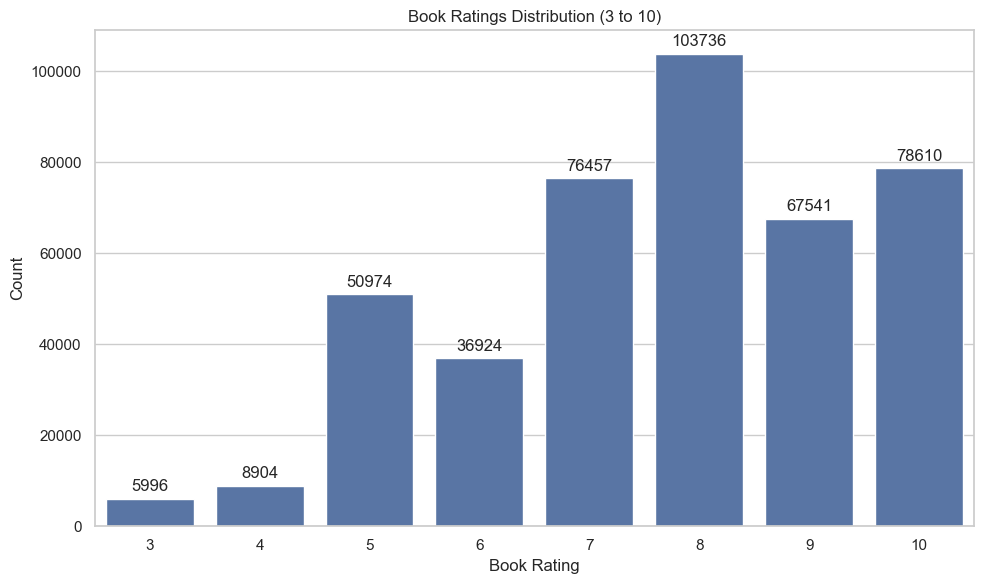

In [14]:
# Prepare the data
ratings_counts = ratings_filtered['Book-Rating'].value_counts().sort_index()

# Plot with annotation
plt.figure(figsize=(10, 6))
sns.barplot(x=ratings_counts.index, y=ratings_counts.values)

# Add text annotations on top of bars
for i, val in enumerate(ratings_counts.values):
    plt.text(i, val + 1000, str(val), ha='center', va='bottom')

plt.title("Book Ratings Distribution (3 to 10)")
plt.xlabel("Book Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


DPI PDF

C:\Users\zirad\AppData\Local\Temp\ipykernel_17236\1330211123.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_counts.index, y=ratings_counts.values, palette='viridis')
c:\Users\zirad\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zirad\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_grou

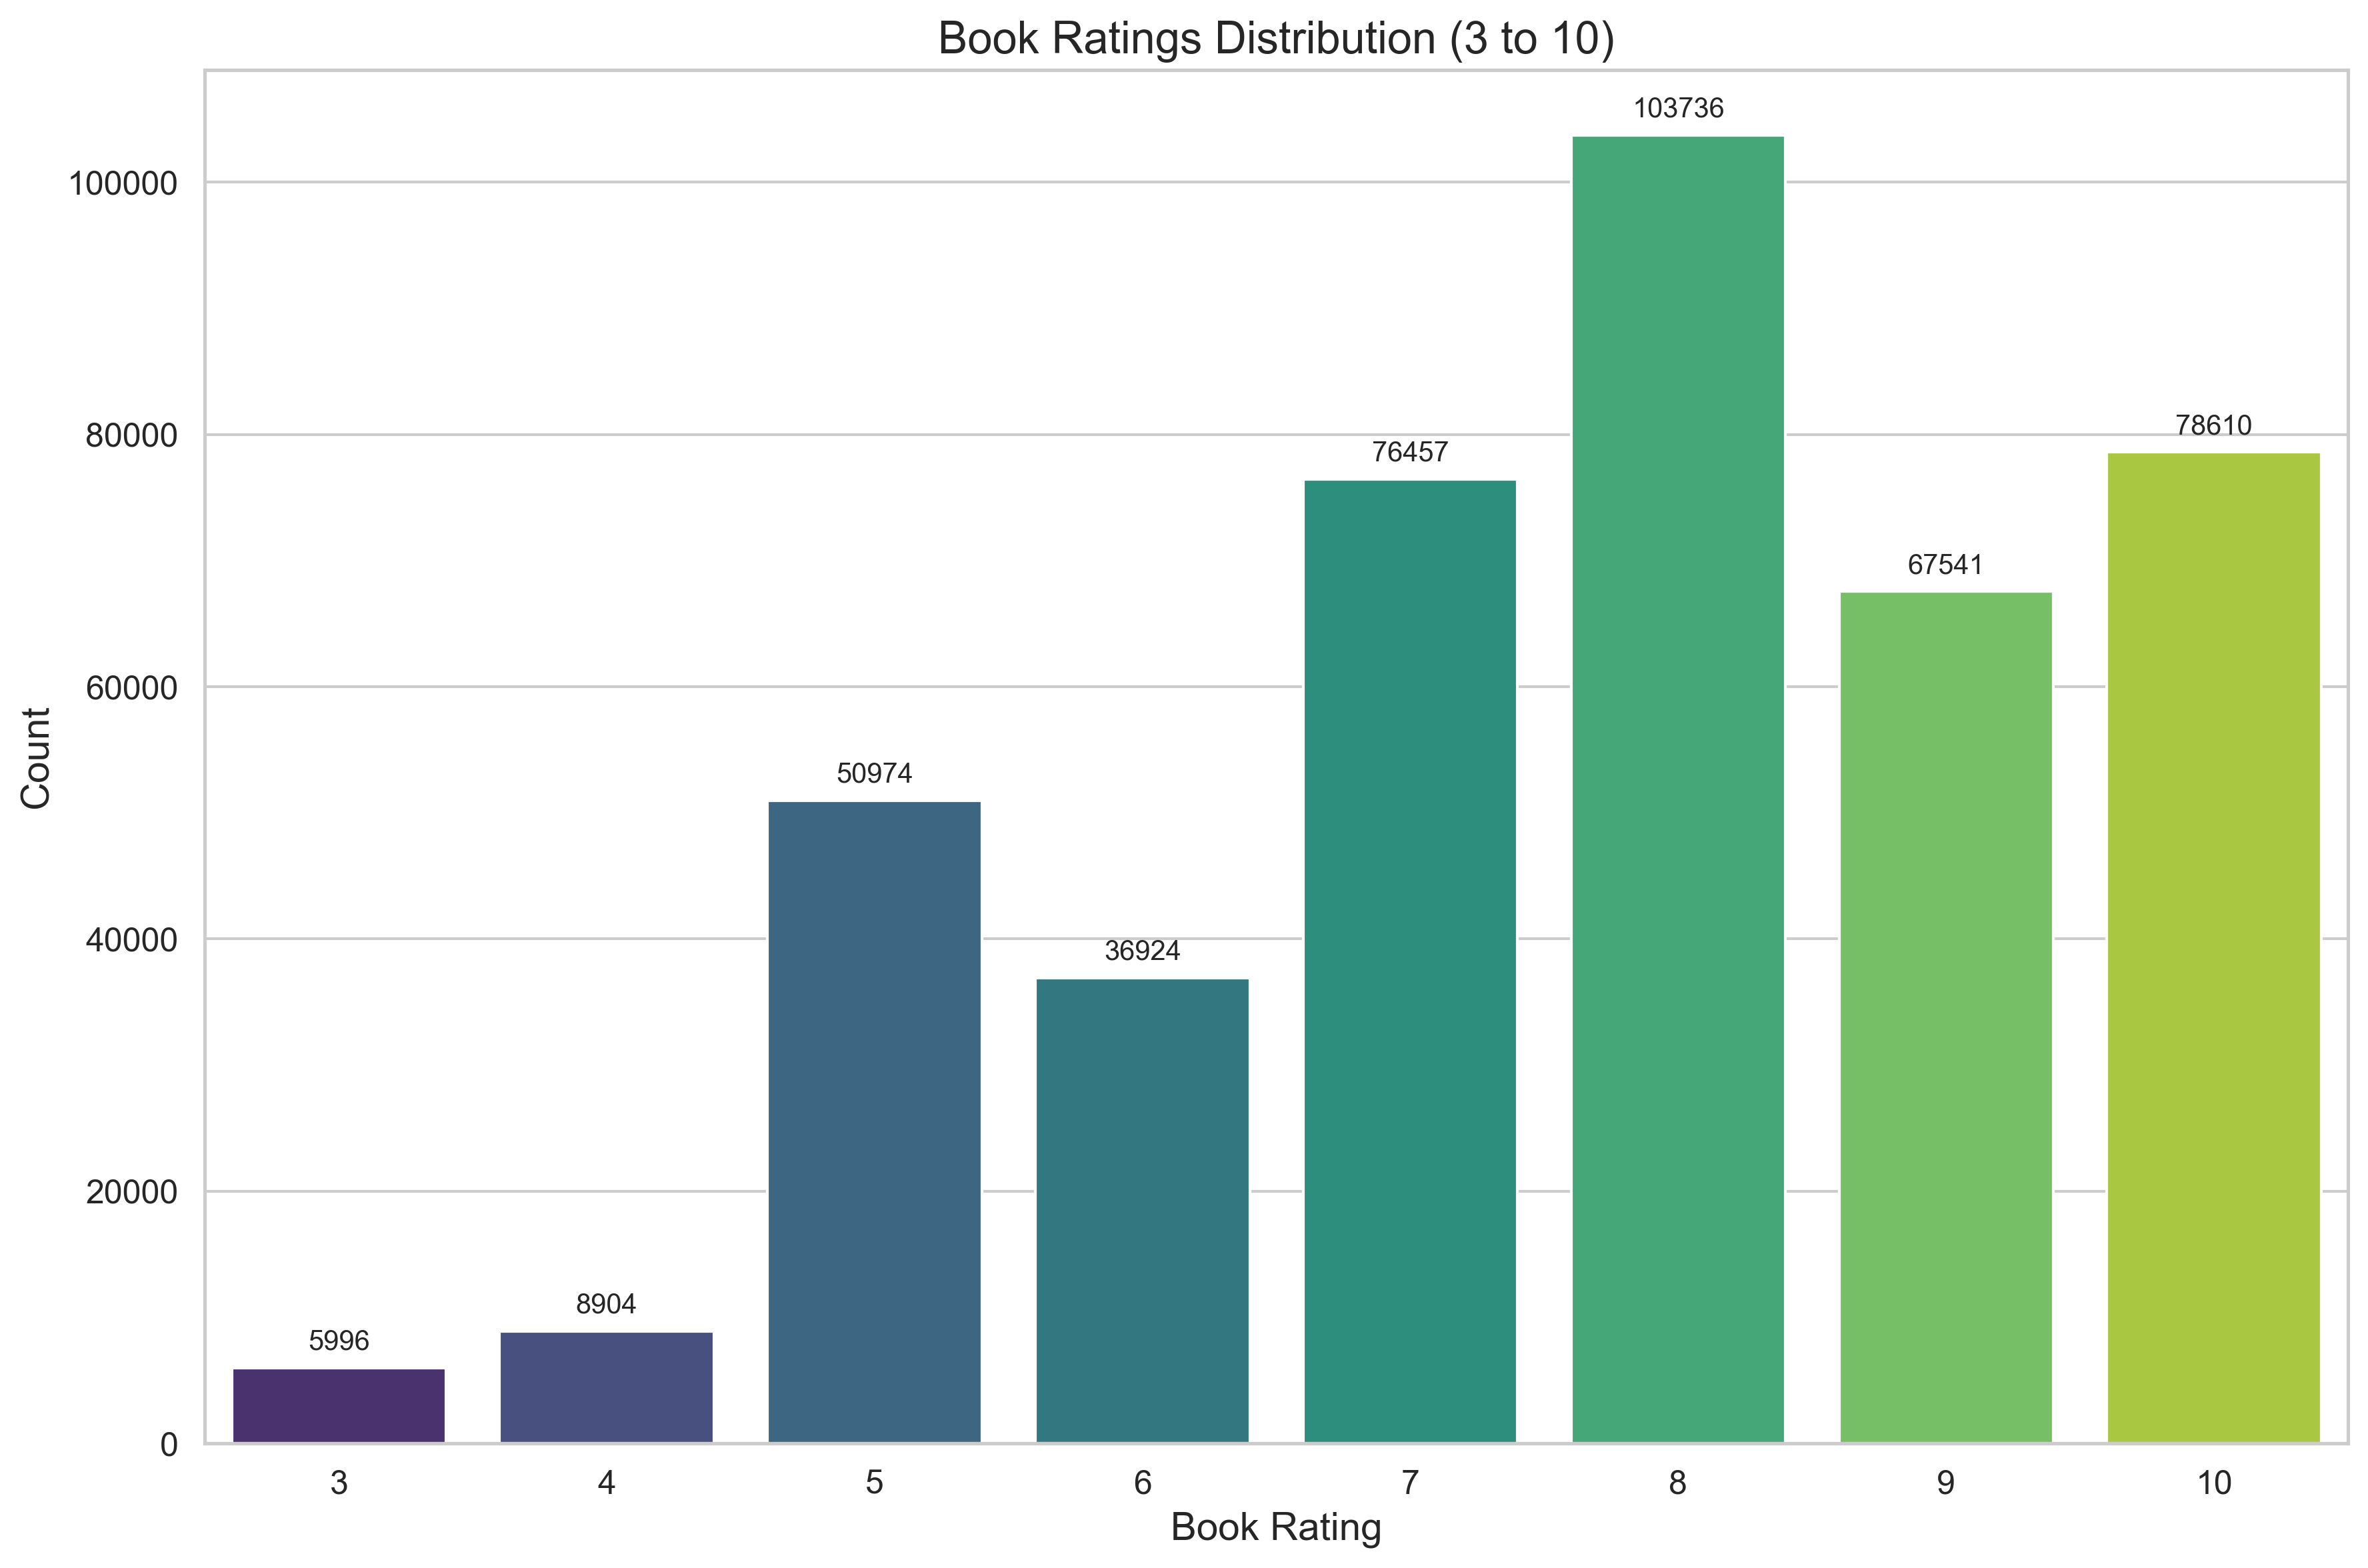

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Prepare the data
# ratings_counts = ratings_filtered['Book-Rating'].value_counts().sort_index()

# # Plot with annotation
# plt.figure(figsize=(12, 8), dpi=300)  # Larger figure, high DPI
# sns.barplot(x=ratings_counts.index, y=ratings_counts.values, palette='viridis')

# # Add text annotations on top of bars
# for i, val in enumerate(ratings_counts.values):
#     plt.text(i, val + 1000, str(val), ha='center', va='bottom', fontsize=10)

# plt.title("Book Ratings Distribution (3 to 10)", fontsize=16)
# plt.xlabel("Book Rating", fontsize=14)
# plt.ylabel("Count", fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.tight_layout()

# # Save as high-resolution PNG and PDF
# plt.savefig("book_ratings_distribution.png", dpi=300)
# plt.savefig("book_ratings_distribution.pdf", dpi=300)

# plt.show()


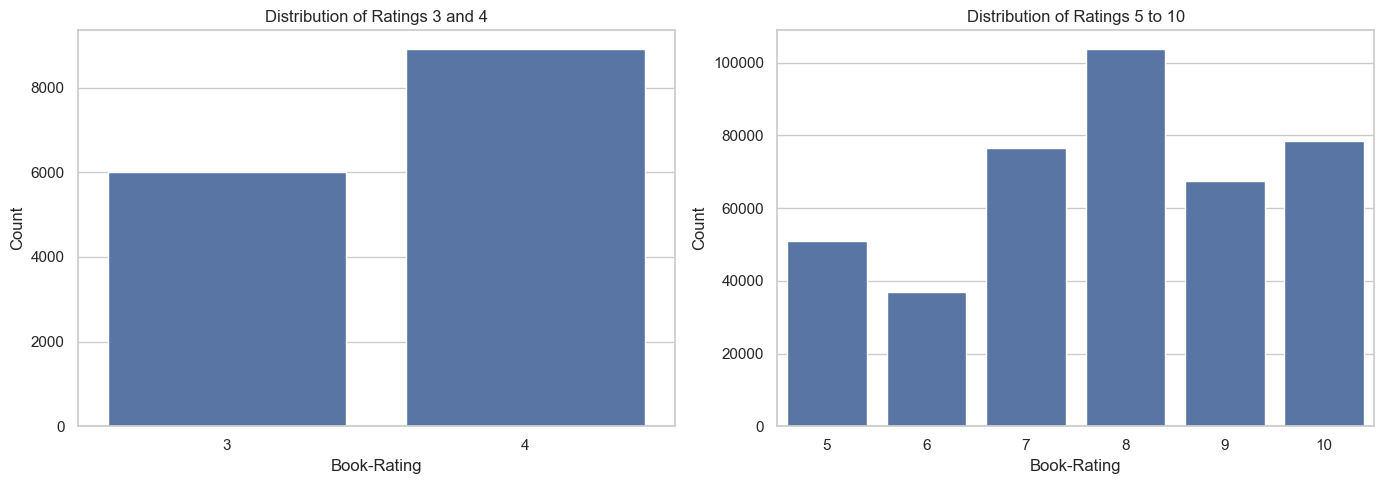

In [16]:
# Redefine the filtered DataFrames since the session was reset
ratings_filtered = df_rating[df_rating['Book-Rating'] > 2]
ratings_3_4 = ratings_filtered[ratings_filtered['Book-Rating'].isin([3, 4])]
ratings_5_10 = ratings_filtered[ratings_filtered['Book-Rating'] >= 5]

# Plot the two groups again
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot ratings 3 and 4
sns.countplot(x='Book-Rating', data=ratings_3_4, ax=axes[0])
axes[0].set_title('Distribution of Ratings 3 and 4')
axes[0].set_ylabel('Count')

# Plot ratings 5 to 10
sns.countplot(x='Book-Rating', data=ratings_5_10, ax=axes[1])
axes[1].set_title('Distribution of Ratings 5 to 10')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()



In [10]:
print(books_df_cleaned.isnull().sum())
print(df_rating.isnull().sum())

print(df_rating['Book-Rating'].describe())

print("Unique users:", df_rating['User-ID'].nunique())
print("Unique books:", df_rating['ISBN'].nunique())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
dtype: int64
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64
Unique users: 105283
Unique books: 340556


In [17]:
# Keep only ratings > 2
ratings_filtered = df_rating[df_rating['Book-Rating'] > 2]

# Filter books with at least 10 ratings
book_counts = ratings_filtered['ISBN'].value_counts()
popular_books = book_counts[book_counts >= 10].index
ratings_filtered = ratings_filtered[ratings_filtered['ISBN'].isin(popular_books)]

# Filter users with at least 5 ratings
user_counts = ratings_filtered['User-ID'].value_counts()
active_users = user_counts[user_counts >= 5].index
ratings_filtered = ratings_filtered[ratings_filtered['User-ID'].isin(active_users)]


In [18]:
# Merge ratings with book details for readability
ratings_merged = ratings_filtered.merge(books_df_cleaned, on='ISBN')


In [19]:
# Pivot table to form the User-Item matrix
user_item_matrix = ratings_merged.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')


In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Fill NaNs with 0 and compute cosine similarity between books
item_similarity = cosine_similarity(user_item_matrix.T.fillna(0))

# Create a DataFrame of similarities
similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)


Book-Title
Angels &amp; Demons                               0.231249
Middlesex: A Novel                                0.144709
Digital Fortress : A Thriller                     0.144113
The Lovely Bones: A Novel                         0.130976
The Secret Life of Bees                           0.130916
Street Dreams                                     0.125819
Widow's Walk                                      0.114785
The Narrows: A Novel                              0.110644
Nights in Rodanthe                                0.110429
No Second  Chance                                 0.110143
The Conspiracy Club                               0.109442
Cyanide Wells                                     0.109281
Stone Cold: A Jesse Stone Novel                   0.107017
Touching Evil                                     0.105955
Evening                                           0.105606
The Future Scrolls                                0.104896
The Red Tent (Bestselling Backlist)          

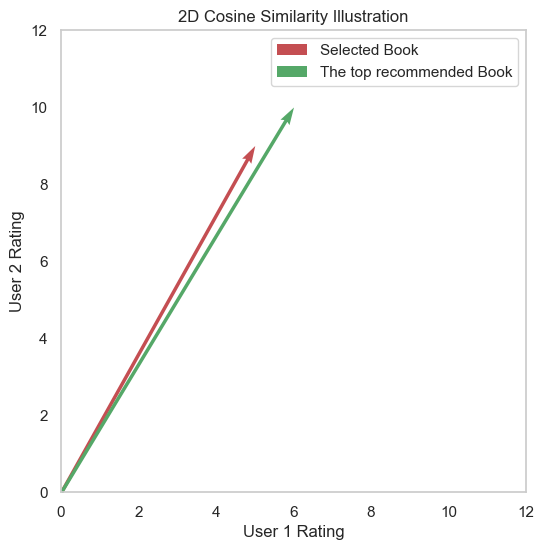

In [37]:
def recommend_books(book_title, n=20):
    if book_title not in similarity_df.columns:
        return "Book not found in matrix."
    similar_scores = similarity_df[book_title].sort_values(ascending=False)[1:n+1]
    return similar_scores

# Example usage:
print(recommend_books("The Da Vinci Code"))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create dummy vectors to represent book ratings (for 3 users)
# Book A: The Da Vinci Code
# Book B: Angels & Demons
# Book C: A random less similar book
vec_A = np.array([5, 9, 7])
vec_B = np.array([6, 10, 6])   # Similar to A
vec_C = np.array([1, 2, 1])    # Not similar to A

# 2D Visualization (first 2 dimensions only)
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, vec_A[0], vec_A[1], angles='xy', scale_units='xy', scale=1, color='r', label='Selected Book')
plt.quiver(0, 0, vec_B[0], vec_B[1], angles='xy', scale_units='xy', scale=1, color='g', label='The top recommended Book')
# plt.quiver(0, 0, vec_C[0], vec_C[1], angles='xy', scale_units='xy', scale=1, color='b', label='Book C')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.grid()
plt.legend()
plt.title("2D Cosine Similarity Illustration")
plt.xlabel("User 1 Rating")
plt.ylabel("User 2 Rating")
plt.show()




In [44]:
def least_similar_books(book_title, n=4):
    if book_title not in similarity_df.columns:
        return "Book not found in similarity matrix."
    similar_scores = similarity_df[book_title].sort_values(ascending=True)
    return similar_scores.head(n)

# Example usage:
print(least_similar_books("The Da Vinci Code", 6))


Book-Title
Fearless #1                                  0.0
El Libro de Las Ilusiones                    0.0
The Midwife's Apprentice (Trophy Newbery)    0.0
Picture of Dorian Gray                       0.0
El Codigo Da Vinci / The Da Vinci Code       0.0
Stronghold (Dragon Star, Book 1)             0.0
Name: The Da Vinci Code, dtype: float64
